In [12]:
import sys
import skimage
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import dask
import dask.array as da
import numpy as np
from dask.dot import dot_graph
from dask.distributed import Client, LocalCluster, progress
from dask.distributed import Scheduler
from skimage.filters import threshold_otsu
from skimage.feature import blob_dog, blob_log, blob_doh
from skimage import data

counter = 0
client = Client()
print client

distributed.deploy.local - INFO - To start diagnostics web server please install Bokeh


<Client: scheduler='tcp://127.0.0.1:54905' processes=4 cores=4>


In [13]:
def otsu_thresholding(image):
	thresh = threshold_otsu(image)
	binary = image > thresh
	return binary

def blob_detection(image):
	blobs_dog = blob_dog(image, max_sigma=30, threshold=.1)
	return blobs_dog



In [14]:
def show_images(image,L,b):
	fig, axes = plt.subplots(ncols=3, figsize=(8, 2.5))
	ax = axes.ravel()

	ax[0] = plt.subplot(1, 3, 1, adjustable='box-forced')
	ax[1] = plt.subplot(1, 3, 2, sharex=ax[0], sharey=ax[0], adjustable='box-forced')
	ax[2] = plt.subplot(1, 3, 3, sharex=ax[0], sharey=ax[0], adjustable='box-forced')

	ax[0].imshow(image, cmap=plt.cm.gray)
	ax[0].set_title('Original')
	ax[0].axis('off')
    
	ax[1].imshow(L, cmap=plt.cm.gray)
	ax[1].set_title('Thresholded')
	ax[1].axis('off')

	blobs =  [b]
	colors = ['blue']
	titles = ['Blob Detection']
	sequence = zip(blobs, colors, titles)
	for blobs, color, title in sequence:
		ax[2].set_title(title)
    	# ax[2].set_title(title)
    	ax[2].imshow(L, cmap=plt.cm.gray)
    	ax[2].axis('off')
    	for blob in blobs:
        	y, x, r = blob
        	c = plt.Circle((x, y), r, color=color, linewidth=1, fill=False)
        	ax[2].add_patch(c)
	
	plt.show()

In [15]:
def array_images():
	custom_imread = (skimage.io.imread)
	images = [custom_imread('/Users/nivethamahalakshmibalasamy/Documents/ECI-PolarScience/dask_stuff/seal/seal%d.jpeg' %i) for i in range(1,10)]
	L1 = client.map(otsu_thresholding, images)
	L2 = client.map(blob_detection, L1)
	print L1
	print "going to client.gather function"
	results1 = client.gather(L1)
	results = client.gather(L2)
	progress(results)
	print "gathered results"

	for i, r1, r in zip(images, results1, results):
		# show_blob(i,r)
		show_images(i,r1,r)

[<Future: status: pending, key: otsu_thresholding-1e047af9ec2f0b362d7ca92d9c182acd>, <Future: status: pending, key: otsu_thresholding-34a08ae0dcb44aad70c83e83e8a065a6>, <Future: status: pending, key: otsu_thresholding-a38017d24a5af9cb62f6f69e499afb4b>, <Future: status: pending, key: otsu_thresholding-a38017d24a5af9cb62f6f69e499afb4b>, <Future: status: pending, key: otsu_thresholding-7dfc850107f63fa1c31fa16dd85257df>, <Future: status: pending, key: otsu_thresholding-1e047af9ec2f0b362d7ca92d9c182acd>, <Future: status: pending, key: otsu_thresholding-856ae75c9123326786554d89ef964f64>, <Future: status: pending, key: otsu_thresholding-650ad8303c9d8e04a9d3c11e4b2a082a>, <Future: status: pending, key: otsu_thresholding-2d30efbbeba879f9736ca1f3aaed6764>]
going to client.gather function
gathered results


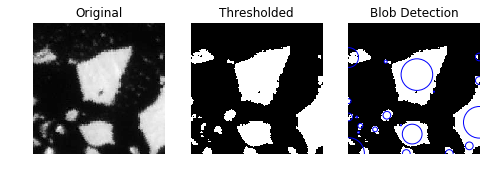

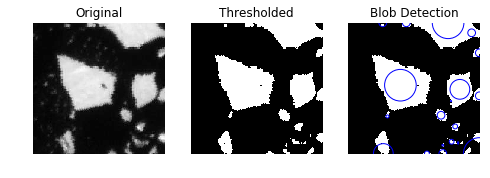

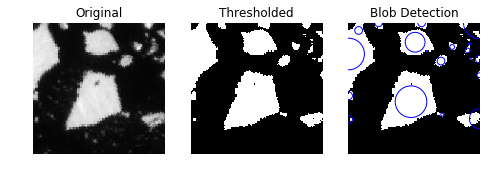

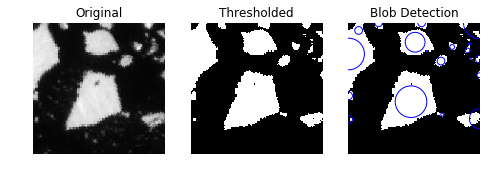

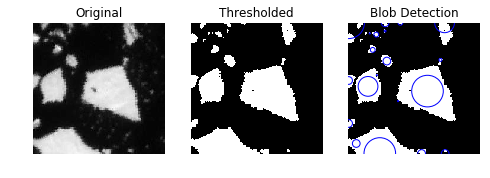

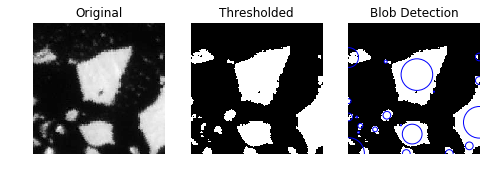

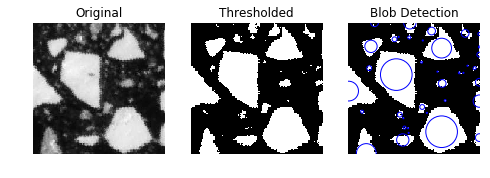

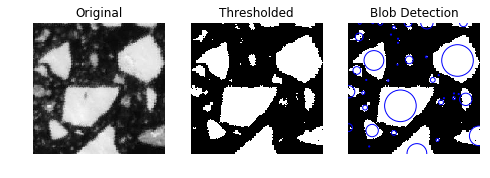

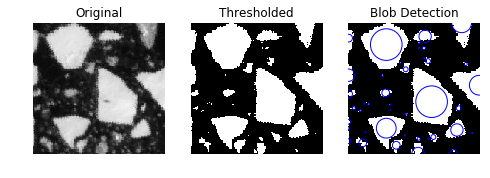

In [16]:
if __name__ == '__main__':
	array_images()
